# Exploratory Data Analysis

## Reading Files into Python

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reding data
df = pd.read_csv('nyc_taxi_trip_duration.csv')

In [3]:
# check data
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [4]:
# last 5 instances
df.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,296
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,315
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,673
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,447
729321,id1053441,2,2016-01-01 17:24:16,2016-01-01 17:44:40,4,-74.003342,40.743839,-73.945847,40.712841,N,1224


In [5]:
# Check the number of rows and columns 
df.shape

(729322, 11)

In [6]:
# get the columns
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

## Variable Identification and Typecasting

In [7]:
# chek the data types
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

### Summary:

*    **id** is the unique identifier assigned to the trip.

*    **pickup and dropoff date time** are date/time object, needs to  be be **convereted to datetime object**.

In [8]:
# Update to datetime
df.pickup_datetime = pd.to_datetime(df.pickup_datetime,format="%Y-%m-%d %H:%M:%S")
df.dropoff_datetime = pd.to_datetime(df.dropoff_datetime,format="%Y-%m-%d %H:%M:%S")

# confirm
df.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

### Check for null values and duplicates

In [9]:
# Check if any null
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

#### No  Null in the data

In [10]:
# Check if any duplicates
df.duplicated().sum()

0

#### No Duplicates in the data

### Check unique values per column

In [11]:
# Check unique values per column
df.nunique()

id                    729322
vendor_id                  2
pickup_datetime       709359
dropoff_datetime      709308
passenger_count            9
pickup_longitude       19729
pickup_latitude        39776
dropoff_longitude      27892
dropoff_latitude       53579
store_and_fwd_flag         2
trip_duration           6296
dtype: int64

### Observations and to do 
1. id has 729322 unique values which is equal to the number of rows in the dataset
2. There are 2 unique vendor ids - this data type is numeric but does not represents a number, convert this to categorical data type
3. pickup_datetime and dropoff_datetime - we an create date related features from thse two columns
4. passenger_count - 9 unique values - again  explore if we can change the data type to category.
5. The latitude and longitude columns - get the distnce using these columns
6. store_and_fwd_flag - 2 unique values for as per the data description
7. trip_duration is the target variable, and there are **only 6296 unique values** - we can explore more on this aspect

In [12]:
df['vendor_id'] = df['vendor_id'].astype('category')

In [13]:
# Get different date components

# use only one of the dates to get the components - as  not expecting too much of difference between a taxi trip
# Use pickup_datetime

df['day_of_month'] = df['pickup_datetime'].dt.day
df['day_name'] = df['pickup_datetime'].dt.day_name()
df['month_name'] = df['pickup_datetime'].dt.month_name()
df['hour'] = df['pickup_datetime'].dt.hour

In [14]:
# Bin the travel hour into four hours slot
# hm_bins = [0,4,7,12,15,19,24]
hr_bins = [0,4,8,12,16,20,24]
hr_labels = ['Late Night', 'Early Morning','Morning','Noon','Eve','Night']

df['hour_slot'] = pd.cut(df['hour'], bins=hr_bins, labels=hr_labels, include_lowest=True)

In [15]:
# convert day of month and hour to categorial data
df['day_of_month'] = df['day_of_month'].astype('category')
df['hour'] = df['hour'].astype('category')

In [16]:
# checking new extracted columns using
df[['pickup_datetime','day_of_month','day_name','month_name','hour','hour_slot']].head()

,pickup_datetime,day_of_month,day_name,month_name,hour,hour_slot
0,2016-02-29 16:40:21,29,Monday,February,16,Noon
1,2016-03-11 23:35:37,11,Friday,March,23,Night
2,2016-02-21 17:59:33,21,Sunday,February,17,Eve
3,2016-01-05 09:44:31,5,Tuesday,January,9,Morning
4,2016-02-17 06:42:23,17,Wednesday,February,6,Early Morning


In [17]:
# Get the distance travelled from the latitude and longitude columns
# import sklearn
from sklearn.neighbors import DistanceMetric

In [18]:
# latitude and longitudes needs to be converted to radians
# add columns with radians for latitude and longitude

df['pickup_lat_radians'] = np.radians(df['pickup_latitude'])
df['pickup_long_radians'] = np.radians(df['pickup_longitude'])

df['dropoff_lat_radians'] = np.radians(df['dropoff_latitude'])
df['dropoff_long_radians'] = np.radians(df['dropoff_longitude'])

In [19]:
# Calculate the distance in KM's
# 6371 is the radius of earth in km's

#dist = sklearn.neighbors.DistanceMetric.get_metric('haversine')
dist = DistanceMetric.get_metric('haversine')

# explore to remove the loop - to do 
dist_km = []
for i, row in df.iterrows():
    z = dist.pairwise([(row['pickup_lat_radians'],row.pickup_long_radians)], [(row['dropoff_lat_radians'],row.dropoff_long_radians)]) * 6371
    dist_km.append(z[0][0])

df['distance'] = dist_km

In [20]:
# remove the lat,long and related 'radians' columns and the dates column
drop_cols = ['pickup_longitude', 'pickup_latitude','dropoff_longitude','dropoff_latitude',
            'pickup_lat_radians','pickup_long_radians','dropoff_lat_radians','dropoff_long_radians',
            'dropoff_datetime','pickup_datetime']

df.drop(columns=drop_cols,inplace=True)

In [21]:
df.columns

Index(['id', 'vendor_id', 'passenger_count', 'store_and_fwd_flag',
       'trip_duration', 'day_of_month', 'day_name', 'month_name', 'hour',
       'hour_slot', 'distance'],
      dtype='object')

In [22]:
# create distance travelled per hour
df['distance_per_hr'] = df['distance'] / (df['trip_duration'] * 60 * 60)
df.head()

,id,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,day_of_month,day_name,month_name,hour,hour_slot,distance,distance_per_hr
0,id1080784,2,1,N,400,29,Monday,February,16,Noon,1.199073,8.326893e-07
1,id0889885,1,2,N,1100,11,Friday,March,23,Night,4.129111,1.042705e-06
2,id0857912,2,2,N,1635,21,Sunday,February,17,Eve,7.250753,1.231864e-06
3,id3744273,2,6,N,1141,5,Tuesday,January,9,Morning,2.361097,5.748119e-07
4,id0232939,1,1,N,848,17,Wednesday,February,6,Early Morning,4.328534,1.417890e-06


In [23]:
df.dtypes

id                      object
vendor_id             category
passenger_count          int64
store_and_fwd_flag      object
trip_duration            int64
day_of_month          category
day_name                object
month_name              object
hour                  category
hour_slot             category
distance               float64
distance_per_hr        float64
dtype: object

## Univariate Analysis: Numerical Variables

In [24]:
# Numerical datatypes
df.select_dtypes(include=np.number).columns #.tolist()

Index(['passenger_count', 'trip_duration', 'distance', 'distance_per_hr'], dtype='object')

In [25]:
df.select_dtypes(include=np.number).describe().round(2)

,passenger_count,trip_duration,distance,distance_per_hr
count,729322.00,729322.00,729322.00,729322.0
mean,1.66,952.23,3.44,0.0
std,1.31,3864.63,4.35,0.0
min,0.00,1.00,0.00,0.0
25%,1.00,397.00,1.23,0.0
50%,1.00,663.00,2.10,0.0
75%,2.00,1075.00,3.88,0.0
max,9.00,1939736.00,1240.91,0.0


In [26]:
# Since distance is not very large, the distance per hour is a very very small number, lets convert it to meters instaed of KM's
df['distance_per_hr'] = df['distance_per_hr'] * 1000

In [27]:
# Get statistical description 
df.select_dtypes(include=np.number).describe(percentiles=[.25, .5, .75,.95]).round(3)

,passenger_count,trip_duration,distance,distance_per_hr
count,729322.000,729322.000,729322.000,729322.000
mean,1.662,952.229,3.441,0.001
std,1.312,3864.626,4.353,0.001
min,0.000,1.000,0.000,0.000
25%,1.000,397.000,1.233,0.001
50%,1.000,663.000,2.096,0.001
75%,2.000,1075.000,3.876,0.001
95%,5.000,2102.000,10.993,0.002
max,9.000,1939736.000,1240.909,0.435


#### Big difference in 95 percentile and max values, all numeric variables have outliers, lets check these first
#### Distance has zero values, explore this

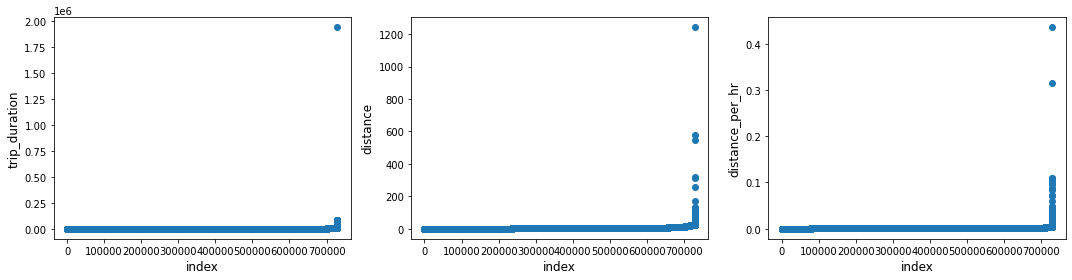

In [28]:
plt.figure(figsize=(15,4))
plt.subplot(1, 3, 1)
plt.scatter(range(df.shape[0]), np.sort(df['trip_duration'].values))
plt.xlabel('index', fontsize=12)
plt.ylabel('trip_duration', fontsize=12)

plt.subplot(1, 3, 2)
plt.scatter(range(df.shape[0]), np.sort(df['distance'].values))
plt.xlabel('index', fontsize=12)
plt.ylabel('distance', fontsize=12)

plt.subplot(1, 3, 3)
plt.scatter(range(df.shape[0]), np.sort(df['distance_per_hr'].values))
plt.xlabel('index', fontsize=12)
plt.ylabel('distance_per_hr', fontsize=12)
plt.tight_layout()

#### This clearly shows the outliers

In [29]:
# Lets remove the outliers
# Function  to remove outliers
# updates and value less than q1-1.5iqr to to q1-1.5iqr and 
# values more than  q3+1.5iqr to q3+1.5*iqr
def rep_ol(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3-q1
    return ( x.clip(lower = q1 - (1.5 * iqr),upper = q1 + (1.5 * iqr)))

In [30]:
# get the numeric columns in a seperate data frame, as  we are updating the original values
df_num = df.select_dtypes(include=np.number).copy()
df_num.head()

,passenger_count,trip_duration,distance,distance_per_hr
0,1,400,1.199073,0.000833
1,2,1100,4.129111,0.001043
2,2,1635,7.250753,0.001232
3,6,1141,2.361097,0.000575
4,1,848,4.328534,0.001418


In [31]:
df_num.describe()

,passenger_count,trip_duration,distance,distance_per_hr
count,729322.000000,7.293220e+05,729322.000000,729322.000000
mean,1.662055,9.522291e+02,3.441139,0.001113
std,1.312446,3.864626e+03,4.353132,0.000952
min,0.000000,1.000000e+00,0.000000,0.000000
25%,1.000000,3.970000e+02,1.232695,0.000704
50%,1.000000,6.630000e+02,2.095672,0.000987
75%,2.000000,1.075000e+03,3.876481,0.001377
max,9.000000,1.939736e+06,1240.908677,0.435223


In [32]:
df_num['trip_duration'] = rep_ol(df_num['trip_duration'])
df_num['distance'] = rep_ol(df_num['distance'])
df_num['distance_per_hr'] = rep_ol(df_num['distance_per_hr'])

In [33]:
df_num.describe()

,passenger_count,trip_duration,distance,distance_per_hr
count,729322.000000,729322.000000,729322.000000,729322.000000
mean,1.662055,741.720930,2.564616,0.001035
std,1.312446,412.344434,1.605513,0.000431
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,397.000000,1.232695,0.000704
50%,1.000000,663.000000,2.095672,0.000987
75%,2.000000,1075.000000,3.876481,0.001377
max,9.000000,1414.000000,5.198374,0.001713


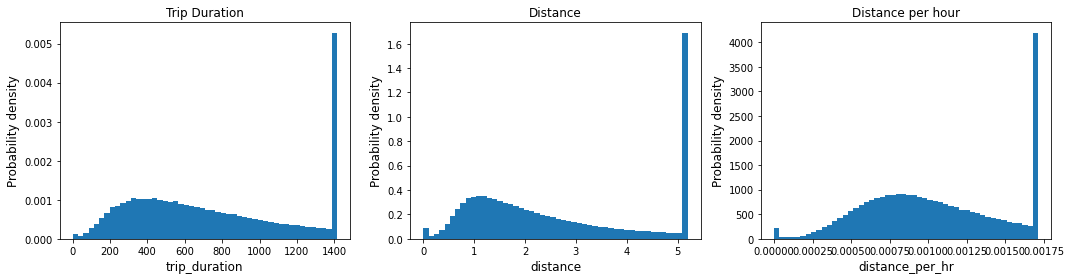

In [34]:
# Visulaize the data now

num_bins = 50

plt.figure(figsize=(15,4))
plt.subplot(1, 3, 1)
plt.hist(df_num['trip_duration'], num_bins, density=True)
plt.xlabel('trip_duration', fontsize=12)
plt.ylabel('Probability density', fontsize=12)
plt.title('Trip Duration')

plt.subplot(1, 3, 2)
plt.hist(df_num['distance'], num_bins, density=True)
plt.xlabel('distance', fontsize=12)
plt.ylabel('Probability density', fontsize=12)
plt.title('Distance')



plt.subplot(1, 3, 3)
plt.hist(df_num['distance_per_hr'], num_bins, density=True)
plt.xlabel('distance_per_hr', fontsize=12)
plt.ylabel('Probability density', fontsize=12)
plt.title('Distance per hour')

plt.tight_layout()

#### After Removing outliers, plots are still very skewed
#### More trips are for shorter duration and distance
### There are zero values for distance but not for trip duration, lets explore 

In [35]:
# How many zero values for distance
df.loc[df['distance'] == 0].shape

(2901, 12)

In [36]:
# Check the mean of time duration for 0 distance
df.loc[df['distance'] == 0]['trip_duration'].mean(),df['trip_duration'].mean(),df.loc[df['distance'] == 0]['passenger_count'].mean()

(524.6849362288866, 952.2291333594764, 1.6956221992416407)

In [37]:
### the mean trip_duration for 0 distance is almost halved than the overall trip duration.
### The 0 distance - can it be cancelled trips ? The trip_duration is not 0.Potentially can be data error too.

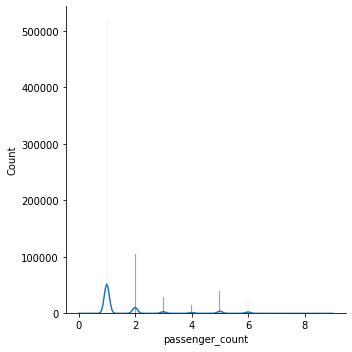

In [38]:
sns.displot(df_num, x="passenger_count", kde=True);

In [39]:
df_num['passenger_count'].value_counts(normalize=True)

1    0.709447
2    0.144102
5    0.053373
3    0.040712
6    0.033054
4    0.019264
0    0.000045
7    0.000001
9    0.000001
Name: passenger_count, dtype: float64

#### Passenger count can be converted to a categorical data instaed of numeric
#### Since more than 4 passengers count is less, we can merge all 4 and above to single category 4+

## Univariate Analysis : Categorical Varibales

In [40]:
df.select_dtypes(include=['object','category']).columns

Index(['id', 'vendor_id', 'store_and_fwd_flag', 'day_of_month', 'day_name',
       'month_name', 'hour', 'hour_slot'],
      dtype='object')

In [41]:
df['vendor_id'].value_counts(normalize=True)

2    0.535403
1    0.464597
Name: vendor_id, dtype: float64

<AxesSubplot:xlabel='vendor_id', ylabel='count'>

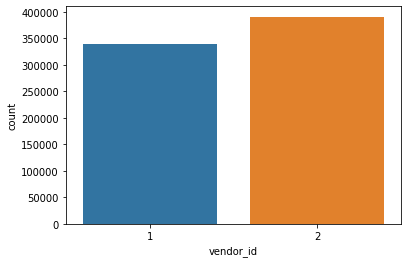

In [42]:
sns.countplot(data=df, x='vendor_id')

In [43]:
# Both categories are equally represented

In [44]:
df['passenger_count'].value_counts(normalize=True)

1    0.709447
2    0.144102
5    0.053373
3    0.040712
6    0.033054
4    0.019264
0    0.000045
7    0.000001
9    0.000001
Name: passenger_count, dtype: float64

<AxesSubplot:xlabel='passenger_count', ylabel='count'>

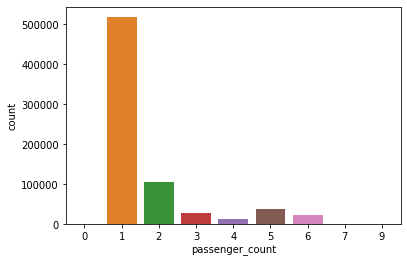

In [45]:
sns.countplot(data=df, x='passenger_count')

In [46]:
# Explore if there is any pattern  on more passengers on weekends etc or lonegr drive , 
# else we can merge above 4 as one category of 4+

In [47]:
df['store_and_fwd_flag'].value_counts(normalize=True)

N    0.994461
Y    0.005539
Name: store_and_fwd_flag, dtype: float64

# 99% trip in this datset is of 'N' category.
# explore this more for patterns for Y with other variables

In [48]:
df.month_name.value_counts(normalize=True)

March       0.175939
April       0.172261
May         0.170297
February    0.163664
June        0.160980
January     0.156859
Name: month_name, dtype: float64

<AxesSubplot:xlabel='count', ylabel='month_name'>

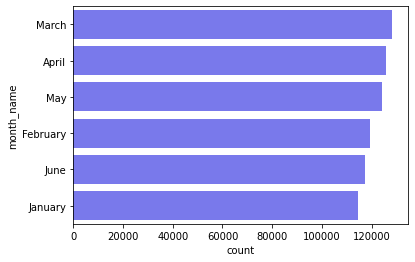

In [49]:
sns.countplot(y=df.month_name,order = df.month_name.value_counts().index,alpha=0.6, color='b')

In [50]:
#### Data is for months Jan to June
#### March has most trips and Jan the least

In [51]:
df.day_of_month.value_counts(normalize=True)

16    0.034990
14    0.034561
12    0.034492
15    0.034329
5     0.034320
4     0.034221
6     0.033945
9     0.033907
13    0.033797
19    0.033793
20    0.033708
10    0.033696
11    0.033402
17    0.033371
21    0.033264
7     0.033256
18    0.033083
8     0.033062
2     0.032769
3     0.032713
26    0.032508
22    0.032396
29    0.032072
27    0.032052
1     0.031938
25    0.031931
28    0.031421
24    0.029996
23    0.028461
30    0.026932
31    0.015616
Name: day_of_month, dtype: float64

<AxesSubplot:xlabel='count', ylabel='day_of_month'>

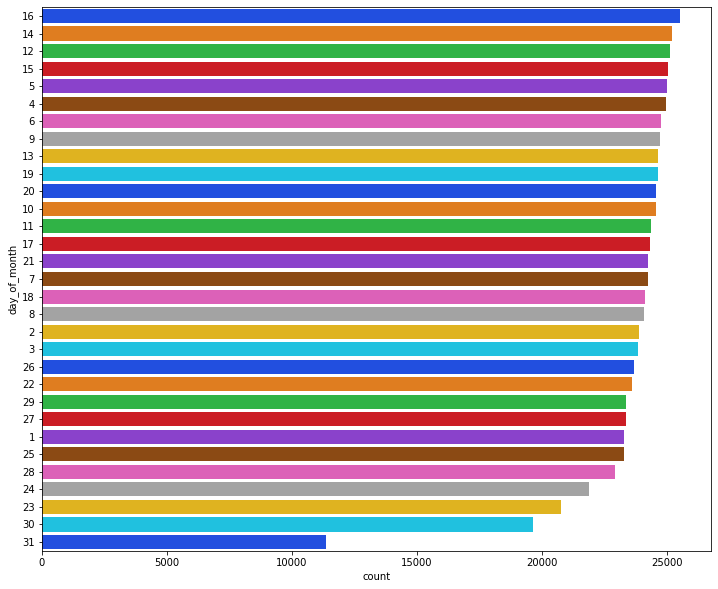

In [52]:
plt.figure(figsize=(12,10))
sns.countplot(y=df.day_of_month,order = df.day_of_month.value_counts().index,palette= 'bright')

### Middle of the month has the most trips, end of month and begining have fewer trips.
### New feature - Get week of the month feature, so that this pattern gets captured

In [53]:
df.day_name.value_counts(normalize=True)

Friday       0.153216
Saturday     0.151171
Thursday     0.149926
Wednesday    0.144071
Tuesday      0.138833
Sunday       0.133935
Monday       0.128848
Name: day_name, dtype: float64

<AxesSubplot:xlabel='count', ylabel='day_name'>

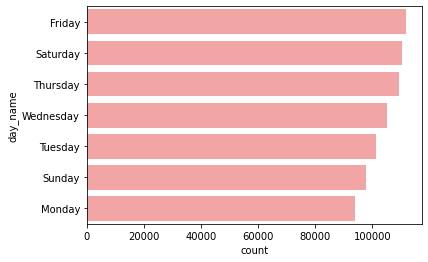

In [54]:
sns.countplot(y=df.day_name,order = df.day_name.value_counts().index,alpha=0.4, color='r')

### Friday,saturday has the most trips and sunday,monday the least.
### Number of trips started incresing from tuesday and goes on increasing till saturday.

In [55]:
df.hour.value_counts(normalize=True)

18    0.062255
19    0.062060
20    0.057814
21    0.057649
22    0.055247
17    0.052532
14    0.050897
12    0.049114
15    0.048932
13    0.048854
23    0.048084
11    0.046702
9     0.046373
8     0.046087
10    0.044854
16    0.044078
7     0.038264
0     0.036645
1     0.026385
6     0.022695
2     0.019141
3     0.014293
4     0.010732
5     0.010312
Name: hour, dtype: float64

<AxesSubplot:xlabel='count', ylabel='hour'>

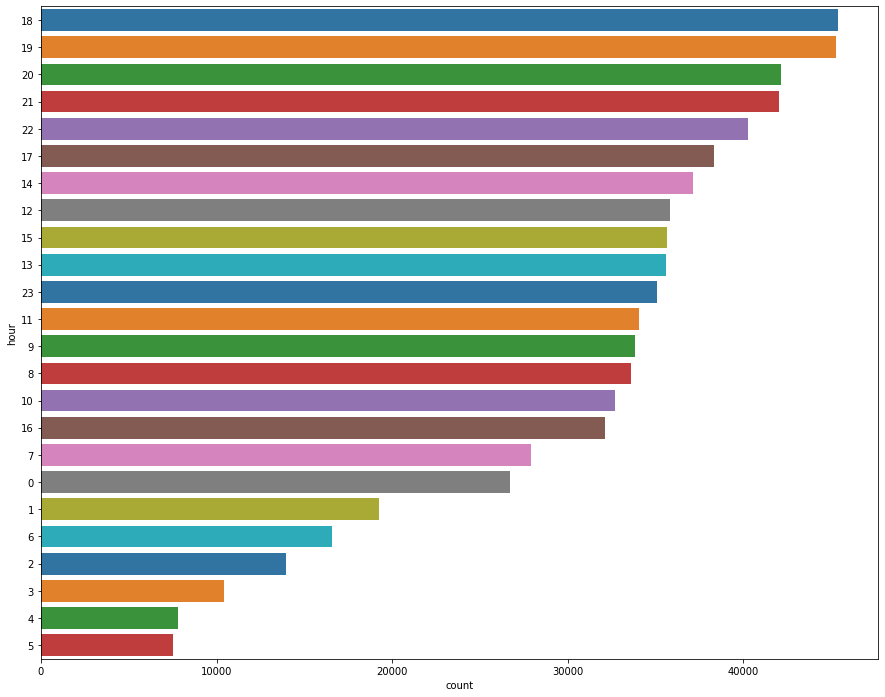

In [56]:
plt.figure(figsize=(15,12))
sns.countplot(y=df.hour,order = df.hour.value_counts().index,palette= 'tab10')

In [57]:
df.hour_slot.value_counts(normalize=True)

Eve              0.234662
Noon             0.192760
Morning          0.187044
Night            0.160981
Early Morning    0.117358
Late Night       0.107195
Name: hour_slot, dtype: float64

<AxesSubplot:xlabel='count', ylabel='hour_slot'>

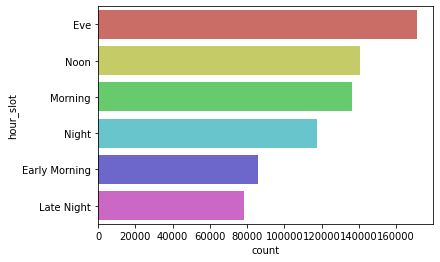

In [58]:
sns.countplot(y=df.hour_slot,order = df.hour_slot.value_counts().index,palette= 'hls')

#### Evening is the highest slot and late night, early morning the least.
#### The hour slot feature, captures the hourly pattern in the data

In [59]:
#fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,8))
#sns.countplot(y='month_name',data=df,alpha=0.5, color='g',ax=ax1)
#sns.countplot(x='day_name',data=df,alpha=0.6, color='b',ax=ax2)
#sns.countplot(x='qtr',data=df,alpha=0.4, color='r',ax=ax3)

## Bivariate Analysis : Numerical-Numerical

In [60]:
# isolating numerical datatypes
df_num.columns

Index(['passenger_count', 'trip_duration', 'distance', 'distance_per_hr'], dtype='object')

### Correlation Matrix

In [61]:
num_corr = df_num.corr()
num_corr

,passenger_count,trip_duration,distance,distance_per_hr
passenger_count,1.000000,0.015197,0.008614,-0.004225
trip_duration,0.015197,1.000000,0.783450,-0.014483
distance,0.008614,0.783450,1.000000,0.521238
distance_per_hr,-0.004225,-0.014483,0.521238,1.000000


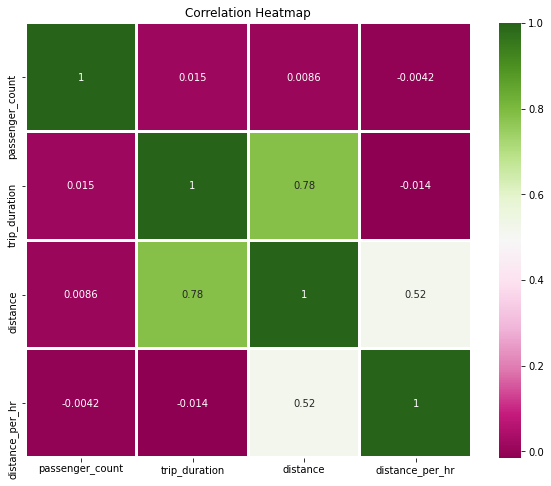

In [62]:
# https://towardsdatascience.com/heatmap-basics-with-pythons-seaborn-fb92ea280a6c
plt.figure(figsize = (10,8))

# Heatmap of correlations
sns.heatmap(num_corr, cmap = 'PiYG', linewidth = 2,annot = True)
plt.title('Correlation Heatmap');

#### Distance and trip_duration are highly correlated

### Scatterplot

<Figure size 840x560 with 0 Axes>

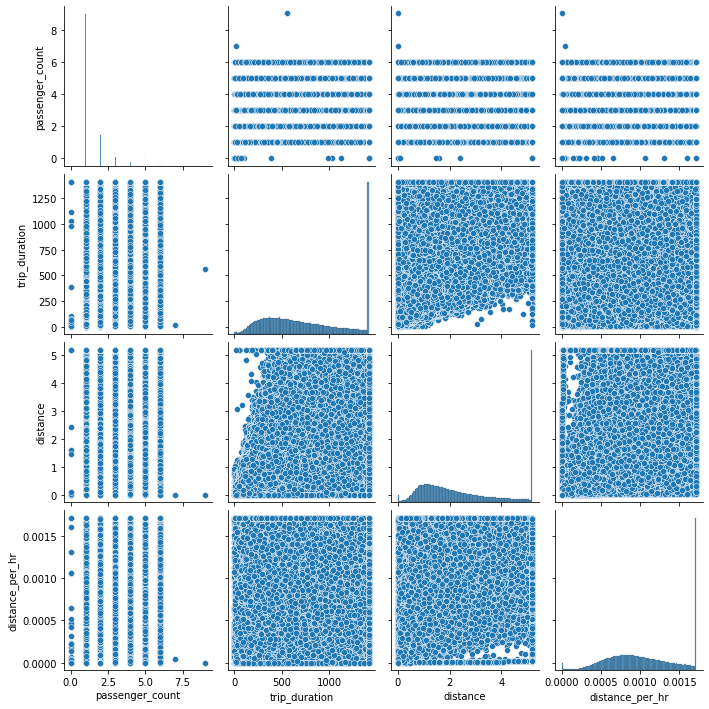

In [63]:
# scatter plot for numerical variables
plt.figure(dpi=140)
sns.pairplot(df_num)

**the scatter plot is not showing any patterns in the data **

In [64]:
# taking log of every value to negate outliers
var = ['trip_duration','distance']
for column in var:
  mini=1
  if df_num[column].min()<0:
    mini =  abs(df_num[column].min()) + 1
  
  df_num[column] = [i+mini for i in df_num[column]]
  df_num[column] = df_num[column].map(lambda x : np.log(x))

<Figure size 840x560 with 0 Axes>

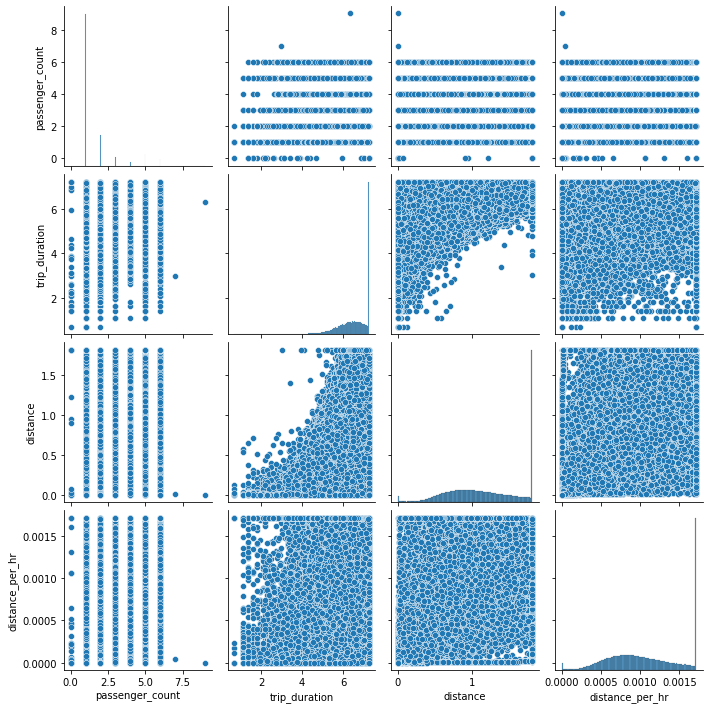

In [65]:
# scatter plot for transactional variables
plt.figure(dpi=140)
sns.pairplot(df_num)

**Inferences**
1.    This validates the high correlation between the trip_duration and distance

## Bivariate Analysis : Numerical-Categorical

In [66]:
df.columns

Index(['id', 'vendor_id', 'passenger_count', 'store_and_fwd_flag',
       'trip_duration', 'day_of_month', 'day_name', 'month_name', 'hour',
       'hour_slot', 'distance', 'distance_per_hr'],
      dtype='object')

<AxesSubplot:xlabel='hour_slot', ylabel='trip_duration'>

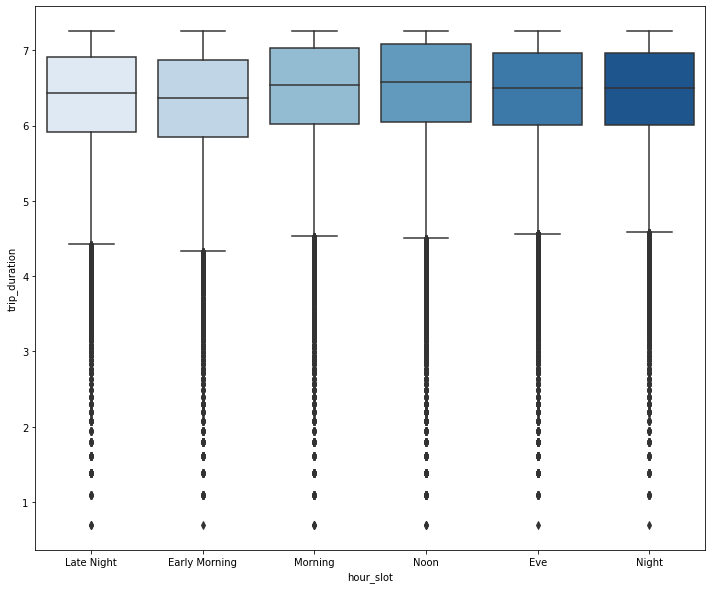

In [67]:
plt.figure(figsize=(12,10))
sns.boxplot(x=df['hour_slot'], y=df_num['trip_duration'], palette="Blues")

In [68]:
#### Morning and Noon the trip duration is more

<AxesSubplot:xlabel='day_name', ylabel='trip_duration'>

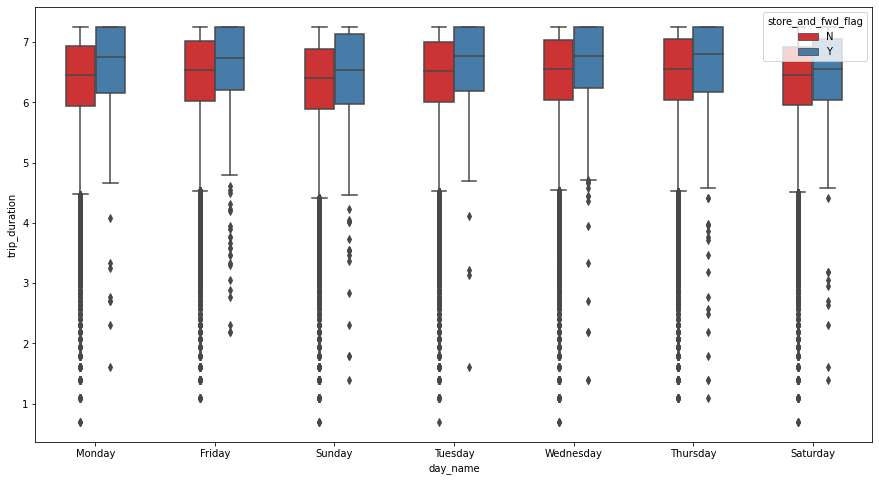

In [69]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df['day_name'], y=df_num['trip_duration'], hue=df['store_and_fwd_flag'],palette="Set1", width=0.5)

#### The trip durations across all days are more for store_and_fwd_flag = Yes

<AxesSubplot:xlabel='passenger_count', ylabel='trip_duration'>

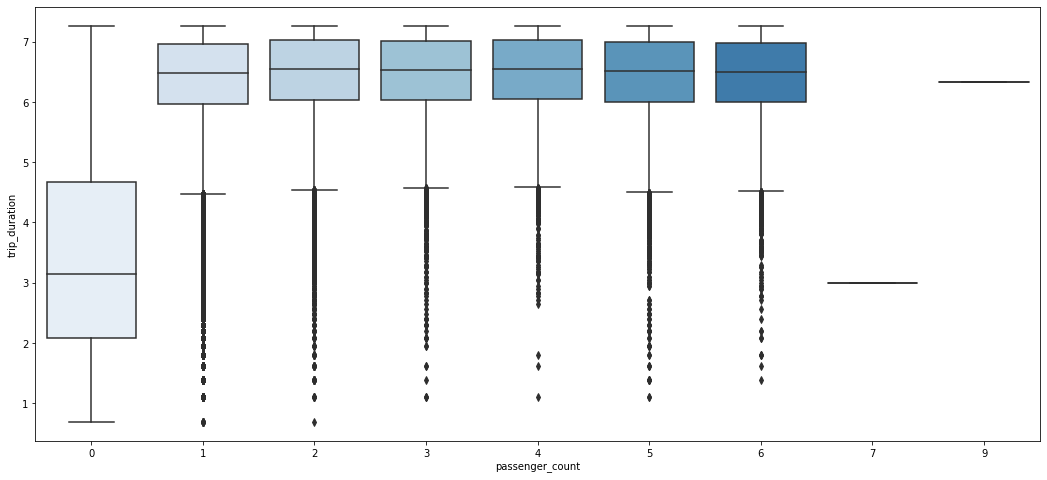

In [70]:
plt.figure(figsize=(18,8))
sns.boxplot(x=df['passenger_count'], y=df_num['trip_duration'], palette="Blues")

#### To do - explore for passenger = 0 pattern  and and distance = 0 

c:\program files\python38\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\program files\python38\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\program files\python38\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\program files\python38\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\program files\python38\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\program files\python38\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  

<Figure size 840x560 with 0 Axes>

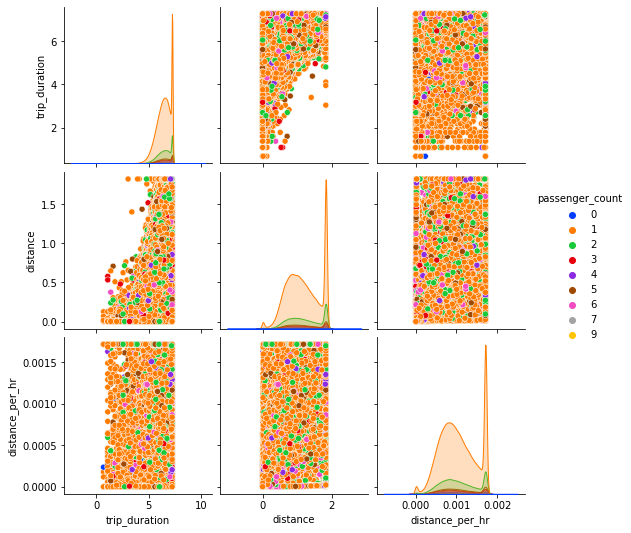

In [71]:
# Lets remove passenger count from the pair plot and treat it as categorical and explore for any patterns
plt.figure(dpi=140)
sns.pairplot(df_num,vars=['trip_duration','distance','distance_per_hr'],hue='passenger_count',palette= 'bright')